<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2

# деактивация предупреждений  
import warnings
warnings.filterwarnings("ignore")

# Импортируем биллиотеки, необходимые для построения графиков.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
# Cчитаем все строки в таблице vacancies с помощью COUNT()
query_3_1 = f'''SELECT COUNT(*) 
                FROM public.vacancies
'''

In [5]:
# результат запроса
vacancies_qty = pd.read_sql_query(query_3_1, connection) # Сохраняем результат запроса в переменную.
# Используем метод squeeze() для преобразования датафрейма с одним элементом в скалярное значение, 
# и выводим результат на экран с помощью f-строки.
display(f'В базе всего {vacancies_qty.squeeze()} вакансий') 


'В базе всего 49197 вакансий'

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
# Cчитаем все строки в таблице employers с помощью COUNT()
query_3_2 = f'''SELECT COUNT(*)
                FROM public.employers
'''

In [7]:
# результат запроса
employers_qty = pd.read_sql_query(query_3_2, connection) # Сохраняем результат запроса в переменную.
display(f'Всего работодателей: {employers_qty.squeeze()}') # Выводим на экран с помощью f-строки.

'Всего работодателей: 23501'

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса
# Cчитаем все строки в таблице areas с помощью COUNT()
query_3_3 = f'''SELECT COUNT(*)
                FROM public.areas
'''

In [9]:
# результат запроса
areas_qty = pd.read_sql_query(query_3_3, connection) # Сохраняем результат запроса в переменную.
display(f'Всего регионов: {areas_qty.squeeze()}') # Выводим на экран с помощью f-строки.

'Всего регионов: 1362'

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса
# Cчитаем все строки в таблице industries с помощью COUNT()
query_3_4 = f'''SELECT COUNT(*)
                FROM public.industries
'''

In [11]:
# результат запроса
industries_qty = pd.read_sql_query(query_3_4, connection) # Сохраняем результат запроса в переменную.
display(f'Всего сфер деятельности: {industries_qty.squeeze()}') # Выводим на экран с помощью f-строки.

'Всего сфер деятельности: 294'

***

**Выводы по предварительному анализу данных:**

База данных довольно обширна. В ней представлены 49197 вакансий в 294 сферах деятельности от 23501 работодателя из 1362 регионов. 

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [12]:
# текст запроса
'''
Выводим столбец с подсчётом вакансий с алиасом cnt и столбец с названием региона с алиасом area 
из таблицы vacancies, соединённой с помощью JOIN с таблицей areas. Группируем по Id региона, 
сортируем по количеству вакансий в порядке убывания. Для выполнения задания 4.1 нужно выбрать 
пятёрку регионов-лидеров по количеству вакансий, поэтому ограничиваем вывод 5ю записями с помощью LIMIT.
'''

query_4_1 = f'''SELECT 
                    COUNT(v.id) cnt, 
                    a.name area
                FROM public.vacancies v
                    JOIN public.areas a ON v.area_id=a.id
                GROUP BY a.id
                ORDER BY cnt DESC
                LIMIT 5
'''
                

In [13]:
# результат запроса
vac_in_area = pd.read_sql_query(query_4_1, connection) # Сохраняем результат запроса в переменную.
display(vac_in_area) # Выводим на экран получившийся dataframe.

,cnt,area
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [14]:
# текст запроса
# Подсчитываем все вакансии из таблицы vacancies, где поле salary_from не является NULL 
# или поле salary_to не является NULL.
query_4_2 = f'''SELECT COUNT(*)
                FROM public.vacancies
                WHERE (salary_from IS NOT NULL) OR (salary_to IS NOT NULL)
'''

In [15]:
# результат запроса
cnt_not_null = pd.read_sql_query(query_4_2, connection) # Сохраняем результат запроса в переменную.
# Выводим на экран с помощью f-строки.
display(f'Количество вакансий, у которых заполнено хотя бы одно из двух полей зарплаты: {cnt_not_null.squeeze()}')

'Количество вакансий, у которых заполнено хотя бы одно из двух полей зарплаты: 24073'

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [16]:
# текст запроса
# Выбираем средние значения из поля salary_from и из поля salary_to таблицы vacancies 
# с помощью агрегатной функции AVG. 
query_4_3 = f'''SELECT 
                    AVG(salary_from) lower_b,
                    AVG(salary_to) upper_b
                FROM public.vacancies
'''

In [17]:
# результат запроса
lower_upper = pd.read_sql_query(query_4_3, connection) # сохраняем результат запроса в переменную.
# Округляем среднее значение нижней границы с помощью функции round() и выводим на экран с помощью f-строки.
display(f'Среднее значение для нижней границы зарплатной вилки: {round(lower_upper.iloc[0][0])}')
# Округляем среднее значение верхней границы с помощью функции round() и выводим на экран с помощью f-строки.
display(f'Среднее значение для верхней границы зарплатной вилки: {round(lower_upper.iloc[0][1])}')

'Среднее значение для нижней границы зарплатной вилки: 71065'

'Среднее значение для верхней границы зарплатной вилки: 110537'

4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [18]:
# текст запроса

# Выбираем из таблицы vacancies уникальные варианты графика и трудоустройства, подсчитываем вакансии с помощью COUNT(), 
# группируем по графику и трудоустройству с помощью метода GROUP BY, сортируем количество вакансий по убыванию.

query_4_4 = f'''SELECT 
                    DISTINCT 
                        schedule,
                        employment,
                    COUNT(*)  
                FROM public.vacancies
                GROUP BY schedule, employment  
                ORDER BY COUNT(*) DESC                 
'''

In [19]:
# результат запроса
combinations = pd.read_sql_query(query_4_4, connection) # Сохраняем результат запроса в переменную.
display(combinations)  # Выводим получившийся датафрейм из одной строки.

,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [20]:
# текст запроса
# Выбираем поле experience из таблицы vacancies, считаем количетво вакансий для большей информативности, 
# группируем по варианту требуемого опыта с помощью GROUP BY, 
# сортируем по количеству вакансий, вычисленному с помощью метода COUNT().
query_4_5 = f'''SELECT experience, COUNT(*)
                FROM public.vacancies
                GROUP BY experience
                ORDER BY COUNT(*)
'''

In [21]:
# результат запроса
experience_ordered = pd.read_sql_query(query_4_5, connection) # Сохраняем результат запроса в переменную.
display(experience_ordered) # выводим на экран результирующий датафрейм.

,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

**Выводы по детальному анализу вакансий:**

1. Вакансии представлены не только работодателями из России, но и из других стран.  Среди лидеров по количеству вакансий мы видим как российские крупные города (Москва, Санкт-Петербург, Новосибирск), так и Минск (Беларусь) и Алматы (Казахстан). 

2. Около половины работодателей не заполнили ни одно из значений заработной платы.

3. В представленных вакансиях предлагаемая заработная плата колеблется в среднем от 71065 до 110537 рублей.

4. Наиболее популярный вариант сочетания графика и занятости - "Полный день - Полная занятость"	- более 35 тысяч вакансий именно с таким сочетанием. На втором месте - "Удалённая работа - Полная занятость" - почти 8 тысяч вакансий. Остальные варианты намного встречаются намного реже. 

5. Более половины работодателей указывает требуемый опыт от 1 года до 3 лет. Реже от 3 до 6 лет. Наименее популярный вариант - более 6 лет. 

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [22]:
# текст запроса
'''
Выбираем название работодателя из таблицы employers, соединённой с помощью JOIN с таблицей vacancies 
по Id работодателя, подсчитываем вакансии с помощью метода COUNT() (это необязательно, но делает выборку 
более информативной), группируем по id работодателя, сортируем по количеству вакансий в порядке убывания. 
Оставляем первые 5 записей, ограничив вывод с помощью LIMIT.
'''

query_5_1 = f'''SELECT 
                    e.name, 
                    COUNT(v.id)
                FROM public.employers e
                    JOIN public.vacancies v ON e.id=v.employer_id
                GROUP BY e.id
                ORDER BY COUNT(v.id) DESC
                LIMIT 5
'''

In [23]:
# результат запроса
empl_1_5 = pd.read_sql_query(query_5_1, connection) # Сохраняем результаты запроса в переменную.
display(empl_1_5) # выводим на экран получившийся датафрейм.
# Выводим с помощью f-строки и метода iloc информацию о работодателях из 1-й и 5-й строк.
display(f'На первом месте работодатель {empl_1_5.iloc[0][0]}, на пятом месте - {empl_1_5.iloc[4][0]}')

,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


'На первом месте работодатель Яндекс, на пятом месте - Газпром нефть'

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [24]:
# текст запроса
''' Соединяем с помощью LEFT JOIN таблицы areas, employers и vacancies по id региона. Группируем по id региона. 
Выбираем название региона, подсчитываем количество работодателей и количество вакансий с помощью метода COUNT(). 
Сортируем выборку по количеству вакансий по возрастанию и по количеству работодателей по убыванию.
'''

query_5_2 = f'''SELECT 
                    a.name area,
                    COUNT(e.id) empl_qty,
                    COUNT(v.id) vac_qty
                FROM public.areas a
                    LEFT JOIN public.employers e ON a.id=e.area
                    LEFT JOIN public.vacancies v ON a.id=v.area_id
                GROUP BY a.id
                ORDER BY vac_qty, empl_qty DESC
'''

In [25]:
# результат запроса
area_empl_vac = pd.read_sql_query(query_5_2, connection) # Сохраняем результаты запроса в переменную.
display(area_empl_vac) # выводим на экран результирующий датафрейм.
# Выводим на экран название региона из первой строки с помощью f-строки и метода iloc.
display(f'Регион, в котором нет вакансий и наибольшее количество работодателей: {area_empl_vac.iloc[0][0]}')

,area,empl_qty,vac_qty
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
...,...,...,...
1357,Новосибирск,1149438,1149438
1358,Алматы,1364132,1364132
1359,Минск,2354880,2354880
1360,Санкт-Петербург,6320667,6320667


'Регион, в котором нет вакансий и наибольшее количество работодателей: Россия'

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [26]:
# текст запроса
''' 
Присваеваем таблице employers алиас е, соединяем с ней с помощью LEFT JOIN таблицу vacancies с алиасом v 
по id работодателя. Выводим название работодателя количество уникальных регионов с помощью методов COUNT() и DISTINCT. 
Группируем по id работодателя, сортируем по количеству регионов по убыванию.
'''

query_5_3 = f'''SELECT
                    e.name employer,
                    COUNT(DISTINCT v.area_id) area_qty
                FROM public.employers e
                    LEFT JOIN public.vacancies v ON e.id=v.employer_id
                GROUP BY e.id
                ORDER BY area_qty DESC
'''

In [27]:
# результат запроса
empl_areas = pd.read_sql_query(query_5_3, connection) # сохраняем результат запроса в переменную.
display(empl_areas) # Выводим на экран получившийся датафрейм.
# С помощью f-строки и метода iloc выводим максимальное количество регионов из 1-й строки и название работодателя.
display(f'Максимальное количество регионов: {empl_areas.iloc[0][1]} (работодатель {empl_areas.iloc[0][0]})')


,employer,area_qty
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23496,Но Смокинг,0
23497,МАСТЕРСКАЯ CREED,0
23498,Dzing Finance,0
23499,КОРС,0


'Максимальное количество регионов: 181 (работодатель Яндекс)'

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [28]:
# текст запроса
# Соединяем таблицы employers и employers_industries с помощью LEFT JOIN и считаем id работодателей, 
# которые оказались пустыми в таблице employers_industries после соединения.
query_5_4 = f'''SELECT COUNT(e.id)
                FROM public.employers e
                    LEFT JOIN public.employers_industries e_i ON e.id=e_i.employer_id
                WHERE e_i.employer_id IS NULL
'''                

In [29]:
# результат запроса
empl_ind = pd.read_sql_query(query_5_4, connection) # сохраняем результат запроса в переменную.
# выводим на экран результат с помощью f-строки и метода squeeze().
display(f'Количество работодателей, у которых не указана сфера деятельности: {empl_ind.squeeze()}')

'Количество работодателей, у которых не указана сфера деятельности: 8419'

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [30]:
# текст запроса
'''
Выбираем название работодателя из таблицы работодателей employers (алиас е), соединённой с помощью JOIN с 
таблицей emloyers_industries (алиас e_i). Группируем по работодателю, ставим условие, что количество указанных 
сфер деятельности равно 4, сортируем по названию компании в алфавитном порядке, с помощью OFFSET отсекаем 
сверху 2 записи и оставляем только компанию, которая на 3ем месте с помощью LIMIT
'''

query_5_5 = f'''SELECT e.name
                FROM 
                    public.employers e
                    JOIN public.employers_industries e_i ON e.id = e_i.employer_id
                GROUP BY e.id
                HAVING COUNT(e_i.industry_id) = 4
                ORDER BY e.name
                OFFSET 2
                LIMIT 1
'''

In [31]:
# результат запроса
# Результат запроса сохраняем в переменную emps_4_ind.
emps_4_ind = pd.read_sql_query(query_5_5, connection)
# Выводим на экран результат с помощью f-строки и метода squeeze.
display(
    f'На 3-ем месте в алфавитном списке компаний, у которых указано 4 сферы деятельности, компания {emps_4_ind.squeeze()}')

'На 3-ем месте в алфавитном списке компаний, у которых указано 4 сферы деятельности, компания 2ГИС'

***ДОПОЛНИТЕЛЬНОЕ ИССЛЕДОВАНИЕ***

Этот пункт я хотела бы дополнить датафреймом с количеством указанных сфер деятельности для каждого работодателя, а также графиком распределения числа работодателей по количеству указанных ими вакансий.

In [32]:
'''
Соединяем таблицу  работодателей employers (алиас е) с таблицей emloyers_industries (алиас e_i) 
с помощью LEFT JOIN по id работодателя. Выбираем название работодателя (алиас employer) и количество сфер 
деятельности (алиас industries_qty). Группируем по работодателю, сортируем по количеству указанных сфер 
деятельности в порядке убывания и по названию компании в алфавитном порядке. 
'''

query_5_5_1 = f'''SELECT 
                    e.name employer,
                    COUNT(e_i.industry_id) industries_qty
                FROM 
                    public.employers e
                    LEFT JOIN public.employers_industries e_i ON e.id = e_i.employer_id
                GROUP BY e.id
                ORDER BY industries_qty DESC, employer
                             
'''

# Cохраняем результат запроса в переменную empl_qty_ind.
empl_qty_ind = pd.read_sql_query(query_5_5_1, connection)
# Выводим на экран получившийся датафрейм.
display(empl_qty_ind)


,employer,industries_qty
0,169,5
1,1AK-GROUP,5
2,1GHS,5
3,1MARKA,5
4,1 Московская Зеркальная фабрика,5
...,...,...
23496,Ярославский завод упаковочных материалов,0
23497,Ярославский филиал ПГУПС,0
23498,Ярославский ЦГМС - филиал ФГБУ Центральное УГМС,0
23499,Ярпож Казань,0


'Среднее значение количества указанных сфер деятельности работодателей: 1.4'

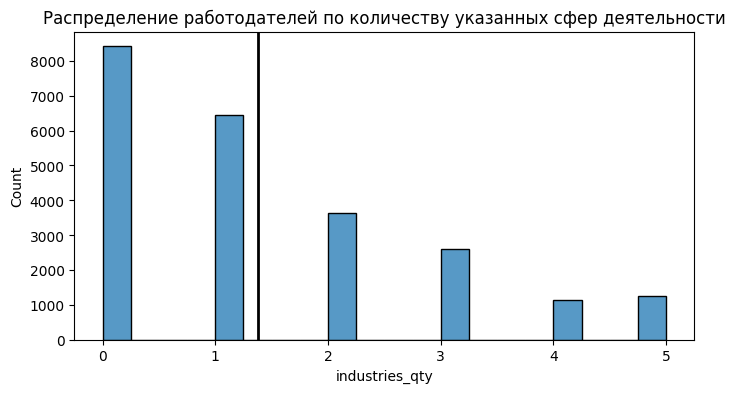

In [33]:
# Создаём координатную плоскость. 
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# сохраняем в переменную qty столбец с количеством указанных сфер деятельности.
qty = empl_qty_ind['industries_qty']
# Строим гистограмму распределения работодателей по количеству указанных ими сфер деятельности.
histplot = sns.histplot(qty, bins=20, ax=ax)
# Добавляем линию среднего арифметического. 
histplot.axvline(qty.mean(), color='k', lw=2)
# Создаём название графика.
histplot.set_title('Распределение работодателей по количеству указанных сфер деятельности');


# Выводим на экран сренее значение, округлённое до десятых.
display(f'Среднее значение количества указанных сфер деятельности работодателей: {round(qty.mean(), 1)}')


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [34]:
# текст запроса
'''
Таблицу employers соединяем с таблицей employers_industries с помощью JOIN (INNER JOIN) и присоединяем к 
таблице industries с помощью RIGHT JOIN с условием, что название сферы деятельности "Разработка программного 
обеспечения". Группируем по названию сферы деятельности и считаем количество id работодателей с помощью COUNT().
'''

query_5_6 = f'''SELECT
                    COUNT(e.id)
                FROM public.employers e
                    JOIN public.employers_industries e_i ON e.id=e_i.employer_id
                    RIGHT JOIN public.industries i ON e_i.industry_id=i.id
                WHERE i.name = 'Разработка программного обеспечения'
                GROUP BY i.name
                
'''                    

In [35]:
# результат запроса
develop_empl_qty = pd.read_sql_query(query_5_6, connection) # сохраняем результат запроса в переменную.
# Выводим результат на экран с помощью f-строки и метода squeeze().
display(f'У {
    develop_empl_qty.squeeze()} работодателей в качестве сферы деятельности указана Разработка программного обеспечения')

'У 3553 работодателей в качестве сферы деятельности указана Разработка программного обеспечения'

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [36]:
# код для получения списка городов-милионников
# Импортируем библиотеку requests.
import requests
# Импортируем библиотеку BeautifulSoup.
from bs4 import BeautifulSoup

# Cохраняем ссылку на веб-страницу в переменную url.
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
# Отправляем GET-запрос и сохраняем результат в переменную response.
response = requests.get(url)
# Создаём объект BeautifulSoup с параметром html.parser, сохраняем под именем soup.
soup = BeautifulSoup(response.text, 'html.parser')
# в таблице находим все теги td и сохраняем их содержимое в переменную tds.
tds = soup.find('table', class_='sortable').find_all('td')
# Создаём пустой список, куда будем сохранять названия городов-миллионников.
million_cities = []
# Создаём цикл, перебираем каждый из тегов td. Если в теге есть ссылка (тег 'a'), извлекаем из него текст 
# и добавляем в список городов-миллионников.
for td in tds:
    if td.a is None:
        continue
    else: 
        million_cities.append(td.a.text)
# превращаем список в кортеж для дальнейшего использования в запросе.
million_cities = tuple(million_cities)
# Выводим на экран получившийся кортеж.
display(million_cities)


('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Красноярск',
 'Челябинск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Краснодар',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [37]:
# текст запроса
'''
1. Создаём выборку под именем sel, чтобы не повторять эту часть запроса дважды. 
Соединяем с помощью JOIN таблицу регионов с алиасом а с таблицей вакансий по id региона. 
Присоединяем таблицу работодателей по id работодателя. Ставим условие: название работодателя равно Яндекс. 
Группируем по id региона. С помощью HAVING отбираем только те регионы, которые входят в кортеж с городами-
миллионниками. Выбираем название региона, подсчитываем id вакансий с помощью COUNT.
2. Используя выборку sel,  выбираем из неё название региона и подсчёт вакансий. Затем добавляем с помощью UNION ALL
строку Total, в которой суммируем подсчитанные вакансии. Сортируем весь список по количеству вакансий по возрастанию.

'''

query_5_7 = f'''WITH sel AS (
                    SELECT
                        a.name, COUNT(v.id) cnt
                    FROM public.areas a
                        JOIN public.vacancies v ON a.id=v.area_id
                        JOIN public.employers e ON v.employer_id=e.id
                    WHERE e.name = 'Яндекс' 
                    GROUP BY a.id
                    HAVING a.name IN {million_cities}
                )
                
                SELECT 
                    sel.name, sel.cnt
                FROM sel
                UNION All
                SELECT 
                    'Total', SUM(sel.cnt)
                FROM sel
                ORDER BY 2
'''

In [38]:
# результат запроса
# сохраняем результат запроса в переменную yandex_cnt.
yandex_cnt = pd.read_sql_query(query_5_7, connection)
# выводим на экран получившийся датафрейм.
display(yandex_cnt)

,name,cnt
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Ростов-на-Дону,25.0
5,Казань,25.0
6,Пермь,25.0
7,Уфа,26.0
8,Самара,26.0
9,Краснодар,30.0


***

**выводы по анализу работодателей:**
1. На первом месте по количеству вакансий - крупная международная корпорация Яндекс. Она лидирует с большим отрывом. Далее идут такие крупные компании как Ростелеком, Тинькофф, Сбер и Газпромнефть. 

2. Многие работодатели не указывают в данных о своей компании конкретный регион и пишут название страны, края или области. Однако, вакансии публикуются в конкретных населённых пунктах, поэтому регионы не всегда совпадают в таблицах с данными о работодателях и о вакансиях.

3. Корпорация Яндекс публикует свои вакансии в наибольшем количестве регионов (181). Также очень многие регионы охватывают такие крупные компании, как Ростелеком и Спецремонт. Немного удивляет присутствие на 3ем месте по охвату регионов ИП Поляков Денис Иванович.  Также присутствуют данные компаний, которые не публикуют вакансий в данное время. Возможно, это старые данные о работодателях, которые публиковались ранее. Можно было бы подумать, что эти работодатели не указали регион в своих вакансиях, однако, при знакомстве с данными мы увидели, что поле региона в таблице вакансий не содержит пропусков. 

4. Более 8 тысяч работодателей не указали сферу деятельности в данных о своей компании. Это более трети от количества представленных работодателей.

5. На третьем месте в алфавитном списке компаний, указавших 4 сферы деятельности, нахдится компания "2ГИС". 

Этот пункт показался мне малоинформативным, и я позволила себе дополнить его графиком распределения работодателей по количеству сфер деятельности, которые они указали. Судя по этому графику, максимальное количество указанных сфер деятельности - 5.  Работодателей, указавших 5 сфер деятельности более тысячи, их даже больше, чем тех, кто указал 4 сферы деятельности.  Наибольшее количество работодателей вообще не указали свои сферы деятельности (8419 работодателей). Более 6 тысяч работодателей указали одну сферу деятельности. Среднее количество указанных сфер деятельности составило 1,4.  

6. У 3553 работодателей в качестве сферы деятельности указана Разработка программного обеспечения.  Это около одной шестой части от общего количества работодателей в базе данных.

7. Корпорация "Яндекс" - лидер по количеству ваканссий, - публикует свои вакансии во всех городах-миллионниках, не менее 20 вакансий в каждом. Больше всего вакансий Яндекса опубликовано в Москве (54) и в Санкт-Петербурге (42).
Всего в городах-миллионниках России опубликовано 485 вакансий Яндекса.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [39]:
# текст запроса
# Подсчитываем все строки из таблицы вакансий с алиасом v, в которых название вакансии включает в себя 'data' или
# 'данн'. Чтобы убрать влияние регистра, используем оператор ILIKE, нечувствительный к регистру.
query_6_1 = f'''SELECT COUNT(*)
                FROM public.vacancies v
                WHERE (v.name ILIKE '%data%') OR (v.name ILIKE '%данн%')
'''

In [40]:
# результат запроса
# Сохраняем результат запроса в переменную data_v_qty.
data_v_qty = pd.read_sql_query(query_6_1, connection)
# Выводим результат на экран с помощью f-строки и метода squeeze().
display(f'Количество вакансий, имеющих отношение к данным: {data_v_qty.squeeze()}')

'Количество вакансий, имеющих отношение к данным: 1771'

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [41]:
# текст запроса
# создаём список шаблонов
tpl = [
    '%data scientist%', 
    '%data science%', 
    '%исследователь данных%', 
    '%machine learning%', 
    '%машинн%обучен%', 
    '%ML%'
]

'''
Подсчитываем вакансии из таблицы vacancies, где в названии вакансии 
встречается любое из указанных в задании сочетаний (чтобы сократить количество выражений с ILIKE, 
с помощью функции ARRAY создаём массив из списка шаблонов tpl и сравниваем название вакансии со всеми 
элементами массива), а также выполняется условие, что в названии вакансии присутствует слово 'junior' 
или требуемый опыт - 'нет опыта', либо занятость обозначается, как 'стажировка'.
'''

query_6_2 = f'''SELECT COUNT(id) cnt
                FROM public.vacancies 
                WHERE 
                    (name ILIKE ANY (ARRAY{tpl})
                    AND name NOT ILIKE '%HTML%')
                    AND (name ILIKE '%junior%'
                    OR experience = 'Нет опыта'
                    OR employment = 'Стажировка')
                            
'''

In [42]:
# результат запроса
# Сохраняем результат запроса в переменную.
ds_junior_vacancies = pd.read_sql_query(query_6_2, connection)
# Выводим результат на экран с помощью f-строки и метода squeeze().
display(f'Количество вакансий, подходящих для начинающих дата-сайентистов: {ds_junior_vacancies.squeeze()}')

'Количество вакансий, подходящих для начинающих дата-сайентистов: 51'

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [43]:
# текст запроса
'''
Подсчитываем вакансии из таблицы vacancies, где в названии вакансии встречается любое из указанных
в задании 6.2 сочетаний (с помощью функции ARRAY создаём массив из списка шаблонов tpl, созданного в 
задании 6.2), а также выполняется условие, что в ключевых навыках присутствуют слова SQL или postgres.
'''

query_6_3 = f'''SELECT COUNT(id) cnt
                FROM public.vacancies 
                WHERE 
                    (name ILIKE ANY (ARRAY{tpl})
                    AND name NOT ILIKE '%HTML%')
                    AND (key_skills ILIKE '%sql%'
                    OR key_skills ILIKE '%postgres%')
                    
'''

In [44]:
# результат запроса
# Сохраняем результат запроса в переменную.
ds_sql_vacancies = pd.read_sql_query(query_6_3, connection)
# Выводим результат на экран с помощью f-строки и метода squeeze().
display(f'Количество вакансий для DS с указанием в ключевых навыках SQL или postgres: {ds_sql_vacancies.squeeze()}')

'Количество вакансий для DS с указанием в ключевых навыках SQL или postgres: 229'

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [45]:
# текст запроса
'''
Подсчитываем вакансии из таблицы vacancies, где в названии вакансии встречается любое 
из указанных в задании 6.2 сочетаний (с помощью функции ARRAY создаём массив из списка шаблонов tpl, 
созданного в задании 6.2), а также выполняется условие, что в ключевых навыках присутствует слово python.
'''

query_6_4 = f'''SELECT COUNT(id) cnt
                FROM public.vacancies 
                WHERE 
                    name ILIKE ANY (ARRAY{tpl})
                    AND name NOT ILIKE '%HTML%'
                    AND key_skills ILIKE '%python%'
                    
'''

In [46]:
# результат запроса
# Сохраняем результат запроса в переменную.
ds_python_vacancies = pd.read_sql_query(query_6_4, connection)
# Выводим результат на экран с помощью f-строки и метода squeeze().
display(f'Количество вакансий для DS с указанием в ключевых навыках Python: {ds_python_vacancies.squeeze()}')

'Количество вакансий для DS с указанием в ключевых навыках Python: 357'

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [47]:
# текст запроса
# в данном задании немного меняется список, т.к. с 'ML' нужно использовать LIKE, а не ILIKE, 
# чтобы в выборку не были включены слова типа 'TeamLead'
tpl_1 = [
    '%data scientist%', 
    '%data science%', 
    '%исследователь данных%', 
    '%machine learning%', 
    '%машинн%обучен%', 
]


'''
С помощью функции LENGTH считаем количество символов в строке ключевого навыка key_skill. Вычитаем из этого количества
число символов в этой же строке после замены разделяющего символа табуляции на пустую строку. 
Получаем количество разделителей, которое меньше количества ключевых навыков на единицу, т.к. стоят между ними.
Добавляем эту единицу. Находим среднее с помощью агрегатной функции AVG, округляем результат до 2 символов после
точки-разделителя и присваиваем результату алиас avg_skills.

Выводим avg_skills из из таблицы vacancies, где в названии вакансии встречается любое из указанных в задании 6.2 
сочетаний (с помощью функции ARRAY создаём массив из списка шаблонов tpl_1, добавляем фильтр по 'ML' и 'HTML')
'''


query_6_5 = f'''SELECT ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) + 1), 2) avg_skills
                FROM public.vacancies 
                WHERE 
                    name ILIKE ANY (ARRAY{tpl_1})
                    OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')           
           
'''

In [48]:
# результат запроса
# Сохраняем результат запроса в переменную.
avg_key_skills = pd.read_sql_query(query_6_5, connection)
# Выводим результат на экран с помощью f-строки и метода squeeze().
display(f'Среднее число ключевых навыков в вакансиях для DS: {avg_key_skills.squeeze()}')

'Среднее число ключевых навыков в вакансиях для DS: 6.41'

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [49]:
# текст запроса
'''
В моём решении значения NULL отсекаются, поэтому мне не потребовалась функция coalesce. 

С помощью WITH создаём подзапрос ds, отбирая оба поля с зарплатой и поле с опытом работы из таблицы вакансий для DS.
Используем снова список шаблонов tpl_1, созданный в задании 6.5. 

Второй подзапрос salary также идёт в блоке WITH через запятую. В нём обращаемся к подзапросу ds и объединяем 
с помощью UNION All записи, в которых оба поля зарплаты заполнены или только одно из них заполнено, отсекая таким
образом записи с незаполненными полями зарплаты. Выбираем поле с опытом работы и значения запрлаты, в зависимости 
от заполненности зарплатных полей, присваиваем зарплате алиас salary_calculated. 

Выводим из подзапроса salary опыт работы и находим среднее значение зарплаты с помощью агрегатной функции AVG().
Делаем группировку по опыту работы. 
'''
query_6_6 = f'''WITH ds AS (SELECT experience, salary_from, salary_to
                            FROM public.vacancies 
                            WHERE name ILIKE ANY (ARRAY{tpl_1})
                                OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
                            ),    
                            
                salary AS   (SELECT experience, ((salary_from + salary_to) / 2) salary_calculated
                            FROM ds
                            WHERE salary_from IS NOT NULL 
                                AND salary_to IS NOT NULL
                            UNION ALL
                            SELECT experience, salary_from
                            FROM ds
                            WHERE salary_from IS NOT NULL 
                                AND salary_to IS NULL
                            UNION ALL
                            SELECT experience, salary_to 
                            FROM ds
                            WHERE salary_to IS NOT NULL 
                                AND salary_from IS NULL)

SELECT experience, AVG(salary_calculated)
FROM salary
GROUP BY experience

'''

In [50]:
# результат запроса
# Сохраняем результат запроса в переменную avg_salaries.
avg_salaries = pd.read_sql_query(query_6_6, connection)
# Выводим получившийся датафрейм на экран.
display(avg_salaries)
# Выводим среднюю зарплату для DS с опытом "От 3 до 6 лет" с помощью f-строки и округляем с помощью round().
display(f'Средняя зарплата для DS с опытом работы от 3 до 6 лет: {round(avg_salaries.iloc[0][1])}')

,experience,avg
0,От 3 до 6 лет,243114.666667
1,От 1 года до 3 лет,139674.750000
2,Нет опыта,74642.857143


'Средняя зарплата для DS с опытом работы от 3 до 6 лет: 243115'

***

**Выводы по предметному анализу:**

1. К данным имеют отношение 1771 вакансии.

2. Количество вакансий, подходящих для начинающих дата-сайентистов - 51. Не так много, но это и понятно: большинство работодателей предпочитают брать на работу опытных специалистов.

3. Количество вакансий для дата-сайентистов с указанием в ключевых навыках SQL или postgres - 229. Это достаточно примерно одна седьмая часть от общего количества вакансий, имеющих отношение к данным. Значит, эти навыки довольно востребованы.

4. Количество вакансий для дата-сайентистов с указанием в ключевых навыках Python - 357. Это более, чем одна пятая часть от общего количества вакансий, имеющих отношение к данным. Видимо, этот навык очень востребован.

5. Среднее число ключевых навыков в вакансиях для дата-сайентистов - 6.41. В вакансиях для DS указывается много требований по ключевым навыкам, т.е. кандидат должен обладать большим количеством навыков, чтобы быть востребованным.

6. Средняя зарплата для специалистов в Data Science довольно высокая. Даже для кандидатов без опыта - 74653 рубля. Это большая зарплата для новичка.  В зависимости от опыта она возрастает до 243115 рублей (при опыте от 3 до 6 лет). Вакансий с требованиями наличия опыта более 6 лет среди рассматриваемых вакансий нет. 

# Общий вывод по проекту

**Подведем итог исследования, обобщите выводы**

В базе данных представлены 49197 вакансий для IT-специалистов в 294 сферах деятельности от 23501 работодателя из 1362 регионов. Больше всего вакансий для специалистов в области IT представлено в крупных городах. Также есть вакансии из других стран. 

Довольно много вакансий с полной занятостью - почти 8 тысяч подходят для удалённой работы, но самый популярный вариант всё же "Полный день - полная занятость". Популярность удалённой работы в последнее время (особенно после пандемии) всё больше растёт, думаю, что в дальнейшем этот вариант графика работы постепенно выйдет на первое место для IT-специалистов, и в таком случае не будет большой необходимости указывать регионы в вакансиях, т.к. работать удалённо можно из любой точки мира. 

На первом месте по количеству вакансий - корпорация Яндекс. Далее идут другие крупные компании. У них очень большой штат, поэтому и специалистов им требуется много в разных регионах. 

Самые востребованные специалисты - с опытом работы от 1 до 3 лет. Думаю, это связано с тем, что сфера IT быстро развивается. В этой сфере постоянно нужно обновлять свои скиллы, но не все специалисты готовы этим заниматься. Поэтому минимальный опыт работы гарантирует, что специалист уже не новичок и, в тоже время, полученные им во время учебы знания ещё не успели устареть.  

Отношение к данным имеют 1771 вакансия. Думаю, сравнивать с этим количеством полученные данные о вакансиях для DS  не совсем корректно. Поэтому, проведя дополнительные исследования ниже, я выяснила, что для дата-сайентистов подходит только 480 из них. 

Наиболее востребованным ключевым навыком для дата-сайентистов является Python - в 357 вакансиях из 480. SQL или Postgres в 229 вакансиях для DS. Это одни из основных навыки, которые должны быть у дата-сайентиста. 

Для начинающих специалистов в Data Science в базе представлена 51 вакансия из 480, думаю, это достаточно много, и  Возможность устроиться сразу после обучения вполне реальна для новичка.

Среднее число ключевых навыков в вакансиях для дата-сайентистов - 6.41. В вакансиях для DS указывается много требований по ключевым навыкам, т.е. кандидат должен обладать большим количеством навыков, чтобы быть востребованным.

Средняя зарплата для специалистов в Data Science довольно высока. 74 тысячи рублей - это высокая зарплата для новичка. В зависимости от опыта она возрастает до более чем 243 тысяч рублей. Вакансий с требованиями наличия опыта более 6 лет среди вакансий для DS нет. 

Ниже приведены дополнительные исследования и очень наглядный график, который показывает зависимость средней заработной платы от опыта работы для дата-сайентистов и других специалистов в сфере IT. Он показывает, что заработная плата специалистов Data Science почти в 2 раза превышает заработную плату, предлагаемую другим IT-специалистам.

Выводы из вышесказанного: специальность дата-сайентиста - очень перспективная и востребованная на рынке труда. Высокая заработная плата отражает как востребованность, так и то, что специалист должен обладать большим количеством навыков.


# ДОПОЛНИТЕЛЬНЫЕ ИССЛЕДОВАНИЯ:

Хочется оценить общее количество вакансий для дата-сайентистов. Ниже я создала запрос, который подсчитывает все вакансии, которые относятся к Data Science.


In [51]:
# запрос
'''
Считаем с помощью COUNT() все строки из из таблицы vacancies, где в названии вакансии встречается любое 
из указанных в задании 6.2 сочетаний (снова используем список шаблонов tpl_1, добавляем фильтр по 'ML' и 'HTML')
'''

query_ds = f'''SELECT COUNT (*)
                FROM public.vacancies 
                WHERE 
                    name ILIKE ANY (ARRAY{tpl_1})
                    OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')           
           
'''

In [52]:
# результат запроса
# Сохраняем результат запроса в переменную avg_salaries.
ds_vacancies = pd.read_sql_query(query_ds, connection)
# Выводим результат подсчёта вакансий с помощью f-строки и функции squeeze().
display(f'Всего вакансий для DS: {ds_vacancies.squeeze()}')

'Всего вакансий для DS: 480'

Также, я думаю, будет полезно посмотреть на средние зарплаты у специалистов, не связанных с Data Science. 

In [53]:
# текст запроса
'''
Делаем аналогичный предыдущему запрос, но выбираем вакансии, которые не подходят под критерии DS.
'''
query_6_6 = f'''WITH ds AS (SELECT experience, salary_from, salary_to
                            FROM public.vacancies 
                            WHERE name NOT ILIKE ANY (ARRAY{tpl})
                            ),    
                            
                salary AS   (SELECT experience, ((salary_from + salary_to) / 2) salary_calculated
                            FROM ds
                            WHERE salary_from IS NOT NULL 
                                AND salary_to IS NOT NULL
                            UNION ALL
                            SELECT experience, salary_from
                            FROM ds
                            WHERE salary_from IS NOT NULL 
                                AND salary_to IS NULL
                            UNION ALL
                            SELECT experience, salary_to 
                            FROM ds
                            WHERE salary_to IS NOT NULL 
                                AND salary_from IS NULL)

SELECT experience, AVG(salary_calculated)
FROM salary
GROUP BY experience

'''

# результат запроса
# Сохраняем результат запроса в переменную other_avg_salaries.
other_avg_salaries = pd.read_sql_query(query_6_6, connection)
# Выводим получившийся датафрейм на экран.
display(other_avg_salaries)


,experience,avg
0,От 3 до 6 лет,133210.916976
1,От 1 года до 3 лет,76540.818863
2,Более 6 лет,166256.080000
3,Нет опыта,40471.945005


Построим для наглядности многоуровневую столбчатую диаграмму, сравнивающую среднюю заработную плату вакансий для DS со средней заработной платой из вакансий для других специалитов.


In [56]:
# Готовим данные для графика: добавляем в датасеты со средней заработной платой столбец 'DS_other', 
# чтобы отметить, где вакансия для датасайентистов, а где - для других специалистов.

avg_salaries['DS_other'] = 'DS'
other_avg_salaries['DS_other'] = 'other'

# Объединяем эти два датафрейма с помощью встроенной функции Pandas concat()
df = pd.concat([avg_salaries, other_avg_salaries])


# Строим на основе полученной таблицы df многоуровневую столбчатую диаграмму с помощью Plotly Express.
fig = px.bar(
    data_frame=df,    
    x='avg',
    y='experience',
    color='DS_other',
    barmode='group',
    text_auto=True,
    title='Зависимость средней заработной платы для DS и других специалистов от опыта работы'
)
fig.show()


График в формате html: [Зависимость средней заработной платы для DS и других специалистов от опыта работы](https://artamiana.github.io/DS_Vacancies_Project/images/avg_salaries.html)

На графике мы видим, насколько сильно - почти в 2 раза средняя заработная плата в вакансиях для дата-сайентистов превышает среднюю заработную плату в вакансиях для других специалистов в сфере IT.